# __FINAL PROJECT PHASE IV__

## *Table of Contents*
1. Introduction <br>
    a. Background and Context <br>
    b. Importance and stakes of our setting <br>
    c. Data Sources and Key Terms <br>
    d. Research Question <br>
    e. Summary of Results <br>
2. Data Description <br>
    a. Brief description and discussion of reliability <br>
    b. Importing the cleaned dataset from a separate data cleaning notebook <br>
3. Visuals for data <br>
    a. Figures from Phase 2 EDA to build background understanding of our cleaned dataset <br>
5. Preregistration Statements <br>
6. Data Analysis <br>
    a. Data Exploration <br>
    b. Research Question Models (part 1) <br>
    c. Analyses of findings <br>
7. Evaluation of Significance <br>
8. Returning to the Main Research Questions <br>
9. Conclusions <br>
10. Limitations <br>
11. Acknowledgements and Bibliography <br>

# __1. INTRODUCTION:__

Streaming media has increasingly become popular in the 21st century, with viewers favoring on-demand content without the restrictions of a fixed broadcast schedule. Recently in 2024, the US movie market was valued at $23.44 billion (Research And Markets 2025). Widely recognized as a popular streaming service, Netflix boasts 301.6 million annual subscribers globally and a 21% US market share of streaming video on demand in 2025 (TwinStrata 2025).  

To maintain retention and achieve maximum profit, companies such as Netflix must guage which titles are popular amongst viewers. Understanding viewers also allows companies to predict how viewers would react to future movies, helping the company decide their future direction. As for viewers, they want to maximize entertainment. When choosing a movie to satisfy their needs, they can turn to IMDb. IMDb is a well-known website that primarily offers ratings and reviews from fellow viewers, as well as rankings and movie information like release year. Given its significance, we decided to investigate Netflix movies and viewership metrics with IMDb ratings and genre. 

In a previous study, researchers used genre popularity as a classification to predict box-office success at a 92.4% accuracy rate (Shahid and Islam 2023). Similarly, we will consider variables that may impact a movie’s popularity in terms of views as the outcome metric. Additionally, our research will only focus on Netflix movie performance, which matters to both society and Netflix company itself. 

Research questions are presented below:


# __Research Question(s):__

### Research Questions:
What set of criteria (genre types, IMDb ratings, number of votes towards ratings, global availability) are important to obtain the most viewership on Netflix from 2023 to 2025? Are we able to accurately predict popularity in terms of viewership according to the characteristics identified as the most influential? 

### Sub-Questions (labeled 1 through 3):
- Does the global availability of movies have a larger impact on the movie popularity (defined in terms of views) compared to ratings, the number of votes, and genres? (1)
- In the past two years, have movies needed to be globally available in order to reach high popularity in terms views of the movie? (2)
- Is there a direct linkage between ratings and number of votes such that number of votes predicts rating?


To conduct this research, we sourced public data from Netflix engagement reports (collected semi-annually and spanning from January 2023 to July 2025) and IMDb files. To elaborate on the set of criterias at hand, viewership is the number of hours that a user watched a movie for divided by the runtime in hours acccumulated in the provided and observed period in the engagment reports. IMDb ratings are out of 10 in ascending order where 1 is lowest and 10 is highest and collected by IMDb. Global availability is essentially whether or not a movie is able to be watched in all countries with Netflix.

### Summary of Results
We created hypothesis tests for each of our three pre-registered subquestions. Via subquestion 2 analysis, we found that globally available movies exceed non-globally available movies in popularity. In fact, via subquestion 1 analysis, we found that the global availability variable has the most significance on popularity compared to ratings, number of votes, and all genres. The global availability variable also has near the highest coefficient, only behind the Talk-Show genre, indicating the magnitude of the variable’s impact. For subquestion 3, after examining the relationship between ratings and logged number of votes, we found that their relationship was weakly negative but statistically significant. We wondered if there was nuance to this relationship, and we decided to further visualize the distribution of ratings across the number of votes. The resulting box plot shows variance with low vote counts, suggesting with bias with ratings. Thus, we pivot to number of votes for our final analysis: To answer the main research question, we ran a train/test split on our cleaned data and found that our criteria has a recall of 98 with identifying non-popular movies.  

Based on the results, Netflix has actionable insights for making their future movie catalogue. Specifically, they should prioritize adding contacts for globally available movies since this trait is very impactful on movie popularity, defined in terms of views. Additionally, Netflix should consider adding more Talk-Show, Adventure, and Action movies, as these genres have p-levels below a 5% level of significance and positive coefficients, so they are positively influential for popularity. To focus on selecting future movies with high popularity, Netflix should also avoid adding genres such as Documentary with significance and negative coefficients.

### Data Overview & Sources:

In total, we collected seven data tables (linked below). The first five are taken from Netflix regarding semi-annual engagement reports starting from the first half of 2023 to the first half of 2025. Each report includes 2 tabs, (Shows and Films) or (Shows and Movies), and their respective data (i.e. runtime, viewership, global availability). The first half of 2023 report is an excpetion with only 1 tab of both shows and movies combined, but this gets handled in our data cleaning.

Meanwhile, the following two IMDb data tables are combined to give us an extensive IMDb table to cross reference with the Netflix engagement reports. The IMDb ratings data table contains all the movies and shows, each identified by a unique ID that is not the movie/show title. The IMDb titles data table provides these IDs and the actual title, allowing us to link each movie/show's ratings with their title. 

### Importing:

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb
from datetime import time
from sklearn.linear_model import LinearRegression, LogisticRegression
import re
import scipy.stats 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#pip install pandas openpyxl

# __2. DATA DESCRIPTION AND CLEANING:__


Here is the link to the ipynb on github of data-cleaning.ipynb: https://github.com/xuanlianliu/Data_Science_Project/blob/862fbb046f0de1b6ac9e8ad7e9c05a4367c43239/data-cleaning.ipynb

In [3]:
#Importing the cleaned dataset from our separate data cleaning notebook
netflix_df = pd.read_csv('netflix_ratings.csv')

### Brief Description and Reliability Discussion
**Why was this dataset created?**
- Our analysis ready dataset was created by joining multiple Netflix engagement reports from different periods and merged with the IMDb ratings dataset to observe if any factors had the most influence on viewership for Netflix movies and predict viewership for movies outside of the dataset according to observed criteria.

- The Netflix engagement report datasets were compiled from Netflix themselves to report to creators, advertisers, and viewers about performance metrics beyond just subscription numbers. These were also published to address the lack of transparency with viewership data. 

- IMDb ratings dataset was compiled to provide the global audience with one of the largest, comprehensive resource for movie data. Doing so allows viewers to make informative decisions on what to watch next.

**Who funded the creation of the dataset?**\
All source datasets used during this phase and their creation were funded by either Netflix or IMDb.

**What are the observations (rows) and the attributes (columns)?**\
Each observation represents a single Netflix movie that was watched within the timeframe of January 2023 to June 2025, along with their respective attributes in terms of global availability, hours viewed, runtime, views, average IMDb rating, number of votes (defined in the next cell). The cleaned dataset for analysis in this report consists of 8564 Netflix movies.

The attributes for our dataset include: 
- Title: the title of the movie (must match in both Netflix and IMDb)  
- Global: either "Yes" or "No" to the movie's ability to be watched in all countries with Netflix  
- Hours_Viewed: the number of hours the movie was watched, accumulated in the time period  
- Runtime: the length of the movie in minutes
- Views: the Hours_Viewed multiplied by the Runtime  
- Time_Period: the time interval in which the viewership data was collected. Is measured semi-annually, either Jan-Jun or Jul-Dec  
- average_Rating: the rating given by IMDb users, out of 10 in ascending order where 1 is lowest and 10 is the highest  
- numVotes: the number of votes cast for the movie 
- Is_Global: measures global availibility, encoded as 1 for movies globally available and 0 for unavailable  
- Popularity: indicates whether a movie had more views than the average movie in the dataset. The popularity threshold was calculated by finding the mean number of views across all movie. Each movie's view count is evaluated with respect to this threshold value and encoded as 1 being popular and 0 for not popular.
- "Genre: Romance": measure if movie is of genre Romance, encoded as 1 for movies that include Romance genre and 0 if not
- "Genre: Comedy": measure if movie is of genre Comedy, encoded as 1 for movies that include Comedy genre and 0 if not
- "Genre: Animation": measure if movie is of genre Animation, encoded as 1 for movies that include Animation genre and 0 if not
- "Genre: Documentary": measure if movie is of genre Documentary, encoded as 1 for movies that include Documentary genre and 0 if not
- "Genre: Sport": measure if movie is of genre Sport, encoded as 1 for movies that include Sport genre and 0 if not
- "Genre: Horror": measure if movie is of genre Horror, encoded as 1 for movies that include Horror genre and 0 if not
- "Genre: Fantasy": measure if movie is of genre Fantasy, encoded as 1 for movies that include Fantasy genre and 0 if not
- "Genre: Sci-Fi": measure if movie is of genre Sci-Fi, encoded as 1 for movies that include Sci-Fi genre and 0 if not
- "Genre: Drama": measure if movie is of genre Drama, encoded as 1 for movies that include Drama genre and 0 if not
- "Genre: News": measure if movie is of genre News, encoded as 1 for movies that include News genre and 0 if not
- "Genre: Action": measure if movie is of genre Action, encoded as 1 for movies that include Action genre and 0 if not
- "Genre: Mystery": measure if movie is of genre Mystery, encoded as 1 for movies that include Mystery genre and 0 if not
- "Genre: Family": measure if movie is of genre Family, encoded as 1 for movies that include Family genre and 0 if not
- "Genre: Adventure": measure if movie is of genre Adventure, encoded as 1 for movies that include Adventure genre and 0 if not
- "Genre: Biography": measure if movie is of genre Biography, encoded as 1 for movies that include Biography genre and 0 if not
- "Genre: History": measure if movie is of genre History, encoded as 1 for movies that include History genre and 0 if not
- "Genre: Music": measure if movie is of genre Music, encoded as 1 for movies that include Music genre and 0 if not
- "Genre: Short": measure if movie is of genre Short, encoded as 1 for movies that include Short genre and 0 if not
- "Genre: Game-Show": measure if movie is of genre Game-Show, encoded as 1 for movies that include Game-Show genre and 0 if not
- "Genre: Talk-Show": measure if movie is of genre Talk-Show, encoded as 1 for movies that include Talk-Show genre and 0 if not

**Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set?**
- Our dataset contains all instances of Netflix movies watched from January 2023 to June 2025 and only a sample of the IMDb dataset. 

- For each Netflix dataset, they consist of all the movies and shows watched within that time period. In the earliest engagement report, Netflix states that the dataset represents 99% of all viewing on Netflix, so there is low concern that data is not recorded. 

- For the IMDb datasets, they consist of all the movies listed on IMDb’s online streaming database. This means that the data includes movies entered into the website, spanning from the late 1800s to the present, but doesn’t include every movie ever made.

- The cleaned dataset that perform data analysis on consists movies in 20 different genres, reaching over 98% coverage of all movies in the dataset. The reason we drop some instances of genres is because there are some genres that only have a few movies, which would be noise in the model instead of important output.

**What processes might have influenced what data was observed and recorded and what was not?**\
Because IMDb ratings are made by users, it is possible that the most recent movies or those with low audience engagement are not observed in the IMDb source dataset. However, these concerns have little impact on our cleaned dataset, which spans until June of 2025 which is 4 months ago and only has movies with over 100,000 Netflix views (thus likely getting some ratings).  

Regarding the data trustworthiness, the Netflix dataset is highly trustworthy because it is viewer analytics self-published by the reputable company. However, anyone on IMDb can rate a film. Not all reviews are the same quality because there is no verification of whether or not they truly watched the film or have external motives (e.g., review bombing to troll or rating highly just because their favorite actor is in it). This could impact our analysis by creating trends that do not exist from those who did not watch the movie as a genuine viewer. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**\
Both Netflix viewers and IMDb reviewers should reasonably know that their behavior is tracked, although they may not know their data would be used to make these public datasets. Fot Netflix viewers, Netflix recommends shows based off of previous titles watched, so users know their watching is monitored. For IMDb reviewers, everyone's ratings are public on the site, so they know their ratings are not private. We do not forsee a notable change in viewing or rating behavior due to the fact that people consider that their data gets collected for a dataset. 

**What preprocessing was done, and how did the data come to be in the form that you are using?**\
As a whole, both the Netflix and IMDb original data sources were preprocessed into (mostly) consistent datasets, but the column names were not consistent with each other. Our original plan was to create a dataset containing both Netflix movies and shows, but upon merging with the IMDb dataset, we discovered that many shows were missing rating information and so we decided to focus solely on movies. This meant reducing our dataset, but given that we still have 8,564 instances of movies, we should have sufficient data for performing exploratory analysis. We decided to retain the majority of the variables found in both the Netflix and IMDb datasets since our research aims to identify which factors most strongly influence viewership. Removing variables could limit the scope of our findings.

Much of the data cleaning that was performed using SQL. Our first task involved merging the IMDb datasets together, as title.ratings.tsv only contains ratings corresponding to an ID and not a movie title while title.basics.tsv includes the corresponding movie title along with their respective IDs. By performing a SQL join on these two datasets, we obtained a single dataframe containing both movie titles and their ratings. 

The second task was to combine all of Netflix’s semi-annual engagement datasets into a master dataset. Using the UNION ALL operator in SQL, we were able to successfully retain all instances from all four datasets. During this process, we also noticed that some Netflix movies contained titles in their original languages which would be a problem when merging with the IMDb dataset that only has titles in English. To ensure consistent title matching, we cleaned up the titles by removing the extra info that followed // by simply replacing a part of the title string with an empty string. Additionally, for applicable cases, we cleaned the titles by removing the year in parenthesis.

Once that was done, we performed an inner join between our Netflix and IMDb datasets using the shared column Title. This join type allowed us to keep only instances of the Netflix dataset with corresponding IMDb data, so our dataset would not have missing rating values. 

Additionally, we created binary variables like Is_Global, Popularity, and 20 genre columns, to support our exploratory analysis. 

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).**\
All raw source data can be found on the Github folder which can also be accessed here. 
https://github.com/xuanlianliu/Data_Science_Project

# __3. Visuals for Data:__

Below are some figures from our Phase 2 EDA to better explain our data.

### Movie Viewership based on Ratings and Global Availability:

Linear Regression (x - ratings, y - viewership), Avg Views on each rating as bar graph

To help gauge whether or not there is a relationship between Views and Ratings and the relationship between Views and Global Availability, we need a series of graphs.

Conduct a scatterplot analysis on the number of views for a movie based on the ratings and global availability.

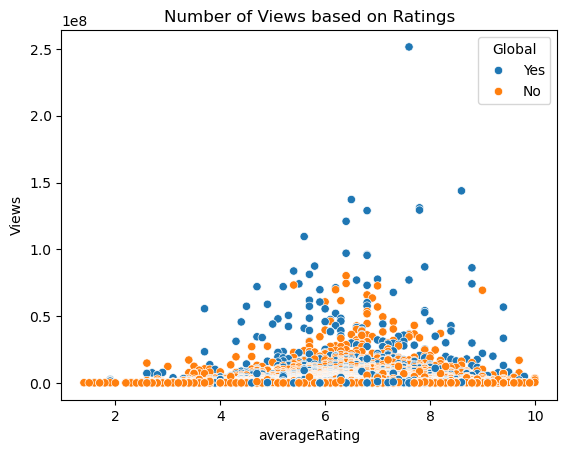

In [4]:
plot = sns.scatterplot(netflix_df, 
             x='averageRating', y='Views', marker='o', hue="Global")
plt.title("Number of Views based on Ratings");

### Correlation and Regression

Now, we will create a multi-variable correlation matrix to examine the strength and directions of relationships with the following variables: Views, Hours Viewed, Runtime, Global Availability, Average Rating, Number of Votes, and Popularity.

In [5]:
corr_df = netflix_df[['Views', 'Hours_Viewed', 'Runtime', 'Is_Global', 
                              'averageRating', 'numVotes', 'Popularity']].corr()
corr_df

,Views,Hours_Viewed,Runtime,Is_Global,averageRating,numVotes,Popularity
Views,1.000000,0.984078,0.033601,0.203215,0.028161,0.083481,0.512624
Hours_Viewed,0.984078,1.000000,0.095979,0.191595,0.036889,0.095416,0.500175
Runtime,0.033601,0.095979,1.000000,-0.104511,0.142158,0.159313,0.070659
Is_Global,0.203215,0.191595,-0.104511,1.000000,0.003813,-0.082120,0.184192
averageRating,0.028161,0.036889,0.142158,0.003813,1.000000,0.102693,0.016610
numVotes,0.083481,0.095416,0.159313,-0.082120,0.102693,1.000000,0.176514
Popularity,0.512624,0.500175,0.070659,0.184192,0.016610,0.176514,1.000000


The correlation matrix displays a very high correlation, 0.98, between Views and Hours Viewed, and this clearly makes sense because being viewed (the number of views) is linked with being viewed (in hours). We also observe a positive correlation of 0.20 between Views and being globally available, a positive correlation of 0.02 between Views and Average Rating, a postive correlation of 0.07 between Views and Number of Votes, and 0.51 between Views and Popularity.

We will fit a linear regression model predict view counts given the ratings.

The model's slope is: 188190.86
The model's intercept is: 1372501.89


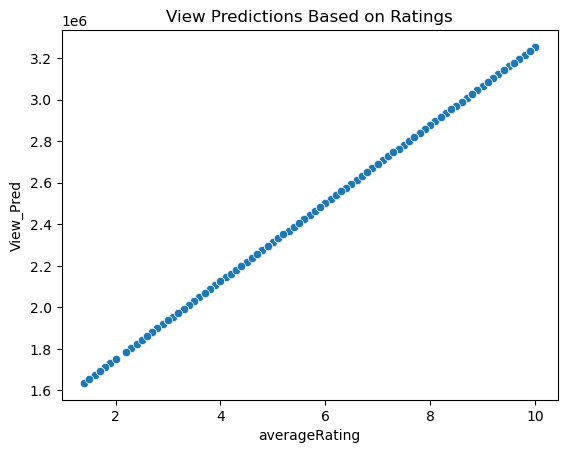

In [6]:
no_nan_df = netflix_df.copy().dropna()
x = no_nan_df[['averageRating']].values
y = no_nan_df[['Views']].values

ratings_model = LinearRegression().fit(x,y)
print("The model's slope is: " + str(round(float(ratings_model.coef_[0][0]),2)))
print("The model's intercept is: " + str(round(float(ratings_model.intercept_[0]),2)))

no_nan_df["View_Pred"] = ratings_model.predict(x)
plot2 = sns.scatterplot(no_nan_df, 
             x='averageRating', y='View_Pred')
plt.title("View Predictions Based on Ratings");


We will fit a logistic regression model to determine the coefficient and intercept to see how the odds of the popularity change for each unit of increase in ratings.

In [7]:
x = netflix_df['averageRating'].values.reshape(-1, 1)
y = netflix_df['Popularity']
model = LogisticRegression().fit(x,y)

print(model.coef_[0][0])
print(model.intercept_[0])

0.03371166967739436
-1.6186724795307845


Using the model's predict_proba, we can find the probability of a movie being successful based on the average rating.

<Axes: xlabel='averageRating', ylabel='popularity_pred'>

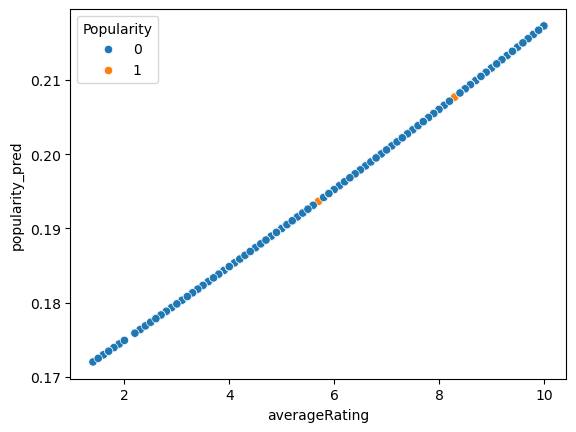

In [8]:
netflix_df['popularity_pred'] = model.predict_proba(netflix_df[
    ['averageRating']].values)[:, 1]
sns.scatterplot(x = netflix_df['averageRating'], 
                y = netflix_df['popularity_pred'], hue = netflix_df['Popularity'])                                                           

For exploratory data analysis, the following pie chart is meant to visualize the bearing that the trait of global analysis has on the top 100 viewed movies, the most popular movies in our dataset.

In [22]:
#Top 100 viewed movies by global availability
netflix_top_100 = duckdb.sql("""SELECT *
                                FROM netflix_df
                                WHERE Views is NOT NULL
                                ORDER BY Views
                                DESC LIMIT 100""").df()
yes_count = (netflix_top_100["Global"]=="Yes").sum()
no_count  = (netflix_top_100["Global"]=="No").sum()

y = np.array([yes_count, no_count])
mylabels = ["Global", "Not Global"]

plt.pie(y, labels = mylabels)
plt.title("Global Availability of Top 100 Most-Watched Movies")
plt.show() 

print(f"{yes_count} movies are globally available and {no_count} are not.")
#creating pie chart source:
#https://www.w3schools.com/python/matplotlib_pie_charts.asp

RuntimeError: Unable to cast Python instance of type <class 'numpy.ndarray'> to C++ type 'duckdb::vector<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, true>'

# __4. PREREGISTRATION STATEMENT(S):__
Sub-question 1: Does the global availability of movies have a larger impact on the movie popularity (defined in terms of views) compared to ratings, the number of votes, and genres?
- $H_0$: Global availability IS NOT the most impactful variable on the movie popularity.
- $H_A$: Global availability IS the most impactful variable on the movie popularity.

Rationale: A past study has found that different genres perform differently in terms of popularity (Francemone 2023). Another team of researchers have used genre, IMDb ratings, and additional variables to create a classification model that achieved over 96% accuracy with classifying movie popularity (Sahu 2022). We have a similar goal of wanting to understand movie popularity. Specifically, we want to explore whether global availability is the most impactful variable for a multivariable logistic regression for popularity. Because globally available movies can potentially reach more individuals, it is likely that they are highly influential in terms of viewership and therefore popularity. Comparing the impact of global availability to ratings, number of votes, and genres, global availability logically seems to reach more people, as not everyone looks at ratings, number of votes, or different types of genres.  Those are more niche.  Therefore, we believe the null hypothesis is likely to be rejected.

Analysis: Run a multivariable logistic regression where global availability, ratings, number of voters, genres (Romance, Comedy, Animation, Documentary, Sport, Horror,  Fantasy, Sci-Fi, Drama, News, Action, Mystery, Family, Adventure, Biography, History, Music, Short, Game-Show, Talk-Show), and interaction genre variables (Romance Comedies, Action Adventures, and Romance Drama) are the inputs and Popularity (binary) is the output. We will print out the summary findings of the regression to observe each input’s p-values and z-score, and see which has the most influence on the output of popular. Based on the p-value and the z-score, which is derived from the p-value, we can decide whether or not to reject the null hypothesis.


Sub-question 2: In the past two years, have globally available movies performed better than non-globally available ones to reach high popularity in terms views of the movie?
- $H_0$: Globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views.
- $H_A$: Globally available movies ARE better than non-globally available movies in being popular, defined in terms of views.

Rationale: While one previous study of 80 countries found that linguistic closeness, geographical distance, and cultural similarities and differences are key factors for TV consumption (Jang et al. 2021), another study found that movies that are related to other popular movies in an individual country or movies that are globally popular have a higher probability of appearing in that individual country’s top 20 list (Lee and Sung 2024). Essentially this past research suggests that globally available movies will be more popular, with nuance from the local, geographic factors. Our research question joins the discourse of whether global availability helps popularity.  
Based on the exploratory pie chart showing 70 out of the top 100 movies being global, it seems like being globally available does make a movie more likely to be popular. Intuitively, this makes sense for two reasons. First, being available globally means a larger audience who may watch the movie. Second, when an audience truly likes a movie, they will spread it to others, and being global increases the potential for this viral sharing. Therefore, we can believe that the null hypothesis has a high chance of being rejected.

Analysis: Calculate the probability of a non-globally available movie being popular. Assuming that global and non-global movies perform the same, find the expected number of popular movies in N movies (where N is the number of global movies). Calculate the standard deviation of the number of globally available popular movies, then calculate the z-score for the prediction relative to the non-global movie distribution. Based on the z-score and comparing to a p-value of 0.05, we can decide whether or not to reject the null hypothesis that global and non-global movies are equally good at achieving popularity.

Sub-question 3: Is there a direct linkage between ratings and number of votes such that number of votes predicts rating?
- $H_0$: Number of votes DOES NOT predict movie's rating at all. 
- $H_A$: Number of votes DOES predict movie's rating.

Rationale: In a past study of movies on IMDb, researchers found that the number of votes follows a consistent pattern without much impact by the movie’s average rating, age and genre, although a few genres and high-budget ones are exceptions (Ramos et al. 2015). This previous research points towards failing to reject our null hypothesis that there is not a direct relationship between ratings and number of votes. However, the paper is from 2015 and its data was collected in March 2013, December 2014, and January 2015. Our IMDb data is from October of 2025. Movie consumption has changed in the last ten years, and our data analysis will investigate whether the past pattern still holds.  
Exploring the relationship between movie ratings and the number of votes is valuable because it can reveal whether ratings serve as a reliable indicator of audience engagement and if the ratings variable can meaningfully contribute to our broader research question on popularity criteria. In many cases, a movie that has a high rating but few votes may reflect a small audience, while a movie with many votes and a moderate rating might better indicate public interest. We’re interested in identifying patterns in how ratings change with increasing vote counts: do ratings stabilize as more viewers contribute, or do they remain inconsistent (simply no pattern)? This analysis will allow us to assess whether ratings alone is a criterion for predicting viewership and avoid misleading conclusions that are based only on the raw number ratings.

Analysis: Conduct a Spearman correlation test to see whether or not number of votes and ratings move together. Observe the printed correlation value to see if ratings tend to increase or decrease a considerable amount as number of votes increases and use the pvalue to determine if there is significance such that number of votes predicts ratings. Following that, run an OLS regression test with the log transformed number of votes as input and average rating as the output. To see if ratings can be predicted in a linear model, evaluate beta coefficient, pvalue, and R^2 value.

# __5. DATA ANALYSIS:__

**Analysis of pre-registration statement 1 is below:**

This bar chart allows us to interpret the popularity of a movie based on the Genre of the movie.  It seems that the Comedy and Drama genres have the most popular movies among them.

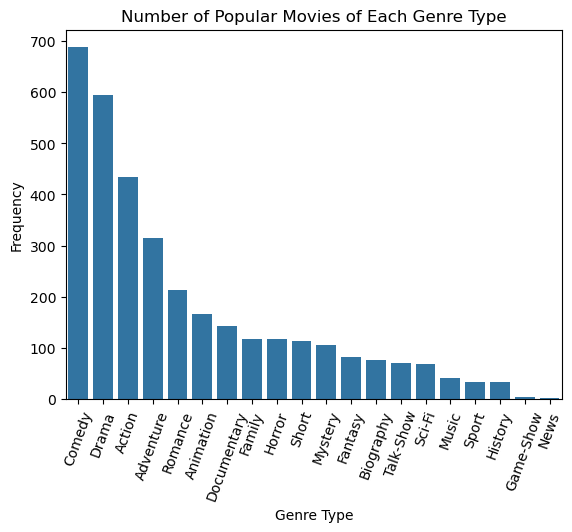

In [10]:
#Creating a bar plot to see which of the genres have the highest frequency of being a popular movie


#create a list containing all the movie genres for ease of access
genres = ["Genre: Romance",
        "Genre: Comedy",
        "Genre: Animation",
        "Genre: Documentary",
        "Genre: Sport",
        "Genre: Horror",
        "Genre: Fantasy",
        "Genre: Sci-Fi",
        "Genre: Drama",
        "Genre: News",
        "Genre: Action",
        "Genre: Mystery",
        "Genre: Family",
        "Genre: Adventure",
        "Genre: Biography",
        "Genre: History",
        "Genre: Music",
        "Genre: Short",
        "Genre: Game-Show",
        "Genre: Talk-Show"]
popular_df = netflix_df[netflix_df["Popularity"] == 1][genres]
sums = []

#finding the frequency for each genre
for g in genres:
    sums.append(popular_df[g].sum())

#variable for the genre names
new_genres = ["Romance",
        "Comedy",
        "Animation",
        "Documentary",
        "Sport",
        "Horror",
        "Fantasy",
        "Sci-Fi",
        "Drama",
        "News",
        "Action",
        "Mystery",
        "Family",
        "Adventure",
        "Biography",
        "History",
        "Music",
        "Short",
        "Game-Show",
        "Talk-Show"]
#Creating the actual bar chart for the genres
df = pd.DataFrame({
    "Genre": new_genres,
    "Frequency": sums
}).sort_values("Frequency",ascending=False)
sns.barplot(df, x="Genre", y="Frequency")
plt.xlabel("Genre Type")
plt.ylabel("Frequency")
plt.title("Number of Popular Movies of Each Genre Type")
plt.xticks(rotation=70)
plt.show()

Once we understand how Genres relate to popularity, it is time to see how much all variables like global availability, number of votes, ratings, and the various Genres affect the prediction of popularity through Logistic Regression.  We also want to add some very common genre combinations (Romance Comedy, Action Adventure, and Drama Romance) as interaction variables as they likely are somewhat related to one another.  

In [11]:
#Multivariable Logistic Model to predict movie popularity

#Add the relevant interaction variables between the genres into X
netflix_df["Romance__x__Comedy"] = netflix_df["Genre: Romance"] * netflix_df["Genre: Comedy"]
netflix_df["Action__x__Adventure"] = netflix_df["Genre: Action"] * netflix_df["Genre: Adventure"]
netflix_df["Drama__x__Romance"] = netflix_df["Genre: Drama"] * netflix_df["Genre: Romance"]

X = netflix_df[["Is_Global",
                "averageRating",
                "numVotes",
                "Genre: Romance",
                "Genre: Comedy",
                "Genre: Animation",
                "Genre: Documentary",
                "Genre: Sport",
                "Genre: Horror",
                "Genre: Fantasy",
                "Genre: Sci-Fi",
                "Genre: Drama",
                "Genre: News",
                "Genre: Action",
                "Genre: Mystery",
                "Genre: Family",
                "Genre: Adventure",
                "Genre: Biography",
                "Genre: History",
                "Genre: Music",
                "Genre: Short",
                "Genre: Game-Show",
                "Genre: Talk-Show",
                "Romance__x__Comedy",
                "Action__x__Adventure",
                "Drama__x__Romance"]]
y = netflix_df["Popularity"]
model = LogisticRegression(max_iter=10000).fit(X,y)
print("The Is_Global coefficient is: " + str(round(float(model.coef_[0][0]),3)))
print("The averageRating coefficient is: " + str(round(float(model.coef_[0][1]),3)))
print("The numVotes coefficient is: " + str(round(float(model.coef_[0][2]),3)))
print("The Genre: Romance coefficient is: " + str(round(float(model.coef_[0][3]),3)))
print("The Genre: Comedy coefficient is: " + str(round(float(model.coef_[0][4]),3)))
print("The Genre: Animation coefficient is: " + str(round(float(model.coef_[0][5]),3)))
print("The Genre: Documentary coefficient is: " + str(round(float(model.coef_[0][6]),3)))
print("The Genre: Sport coefficient is: " + str(round(float(model.coef_[0][7]),3)))
print("The Genre: Horror coefficient is: " + str(round(float(model.coef_[0][8]),3)))
print("The Genre: Fantasy coefficient is: " + str(round(float(model.coef_[0][9]),3)))
print("The Genre: Sci-Fi coefficient is: " + str(round(float(model.coef_[0][10]),3)))
print("The Genre: Drama coefficient is: " + str(round(float(model.coef_[0][11]),3)))
print("The Genre: News coefficient is: " + str(round(float(model.coef_[0][12]),3)))
print("The Genre: Action coefficient is: " + str(round(float(model.coef_[0][13]),3)))
print("The Genre: Mystery coefficient is: " + str(round(float(model.coef_[0][14]),3)))
print("The Genre: Family coefficient is: " + str(round(float(model.coef_[0][15]),3)))
print("The Genre: Adventure coefficient is: " + str(round(float(model.coef_[0][16]),3)))
print("The Genre: Biography coefficient is: " + str(round(float(model.coef_[0][17]),3)))
print("The Genre: History coefficient is: " + str(round(float(model.coef_[0][18]),3)))
print("The Genre: Music coefficient is: " + str(round(float(model.coef_[0][19]),3)))
print("The Genre: Short coefficient is: " + str(round(float(model.coef_[0][20]),3)))
print("The Genre: Game-Show coefficient is: " + str(round(float(model.coef_[0][21]),3)))
print("The Genre: Talk-Show coefficient is: " + str(round(float(model.coef_[0][22]),3)))
print("The Romance__x__Comedy coefficient is: " + str(round(float(model.coef_[0][23]),3)))
print("The Action__x__Adventure coefficient is: " + str(round(float(model.coef_[0][24]),3)))
print("The Drama__x__Romance coefficient is: " + str(round(float(model.coef_[0][25]),3)))

The Is_Global coefficient is: 1.282
The averageRating coefficient is: 0.016
The numVotes coefficient is: 0.0
The Genre: Romance coefficient is: -0.09
The Genre: Comedy coefficient is: -0.04
The Genre: Animation coefficient is: 0.015
The Genre: Documentary coefficient is: -0.454
The Genre: Sport coefficient is: 0.11
The Genre: Horror coefficient is: 0.011
The Genre: Fantasy coefficient is: 0.11
The Genre: Sci-Fi coefficient is: 0.026
The Genre: Drama coefficient is: -0.326
The Genre: News coefficient is: -0.039
The Genre: Action coefficient is: 0.547
The Genre: Mystery coefficient is: 0.061
The Genre: Family coefficient is: 0.201
The Genre: Adventure coefficient is: 0.451
The Genre: Biography coefficient is: 0.117
The Genre: History coefficient is: -0.234
The Genre: Music coefficient is: -0.237
The Genre: Short coefficient is: 0.092
The Genre: Game-Show coefficient is: -0.087
The Genre: Talk-Show coefficient is: 1.407
The Romance__x__Comedy coefficient is: 0.498
The Action__x__Adventure

Because the coefficients are significantly higher in the Talk-Show Genre and the Is_Global variable, they seem likely to have more of an impact on popularity.  To verify this, we have to look at the p-values of all variables and to see whether to reject the null hypothesis or fail to reject.  This is done through the logit() function, where we can see a summary table that contains the z-score and also the P-Value.

In [12]:
#Summary Table to compare impacts of global availability, ratings, number of votes, and genres
X = sm.add_constant(X)
logitModel = sm.Logit(y, X).fit()
print(logitModel.summary())

Optimization terminated successfully.
         Current function value: 0.448621
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Popularity   No. Observations:                 8564
Model:                          Logit   Df Residuals:                     8537
Method:                           MLE   Df Model:                           26
Date:                Fri, 05 Dec 2025   Pseudo R-squ.:                 0.09797
Time:                        13:40:42   Log-Likelihood:                -3842.0
converged:                       True   LL-Null:                       -4259.3
Covariance Type:            nonrobust   LLR p-value:                3.643e-159
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.1504      0.185    -11.628      0.000      -2.513      -1.788

Since many of the p-values are 0.000 to be able to gauge the most impact, we may need to see more than just 3 decimal places, so here we show more precise p-values for each variable.

In [13]:
print(logitModel.pvalues)

const                   2.980368e-31
Is_Global               3.842529e-84
averageRating           3.483879e-01
numVotes                4.686117e-36
Genre: Romance          8.773624e-01
Genre: Comedy           8.723205e-01
Genre: Animation        3.758126e-01
Genre: Documentary      1.562032e-03
Genre: Sport            3.825631e-01
Genre: Horror           8.531704e-01
Genre: Fantasy          3.428284e-01
Genre: Sci-Fi           6.323915e-01
Genre: Drama            1.213793e-04
Genre: News             5.388819e-01
Genre: Action           4.022330e-10
Genre: Mystery          5.587035e-01
Genre: Family           4.380031e-02
Genre: Adventure        3.197253e-05
Genre: Biography        4.571402e-01
Genre: History          2.820410e-01
Genre: Music            3.755577e-01
Genre: Short            1.004210e-01
Genre: Game-Show        8.437141e-01
Genre: Talk-Show        5.011958e-18
Romance__x__Comedy      1.436184e-02
Action__x__Adventure    8.402451e-01
Drama__x__Romance       8.667563e-01
d

**Analysis and Interpretation for Preregistation #1**\
Summary:
- The p-value of global availability is approximately 0.000 (3.842529e-84), indicating that the effect of global availability on popularity is statistically significant and not due to random chance
- Beyond global availability, the number of votes, and some genres (Documentary, Drama, Action, Adventure, and Talk-Show) also show statistical significance, having p-values of under 0.001.  While average ratings are statistically insignificant with a p-value of 0.348.
- The interaction variable for Romance Comedies also shows some statistical significance compared to the other interaction variables, with a p-value of 0.014.
- The p-value of global availability is lower than all other predictor variables, indicating that global availability has the most significant impact on the popularity of movies compared to other predictor variables.
- We can reject the null hypothesis, so there is sufficient evidence that Global Availability may be the most impactful and significant variable on movie popularity.

Interpretations/Predictions:
- All else equal, if a movie is globally available, we expect the odds of popularity to be multiplied by e^1.2784=3.591, which corresponds to a 100*(3.591-1) = 259.1% increase in the odds of being popular compared to non-popular.
- All else equal, a 10,000 unit increase in the number of votes, we expect the odds of popularity to be multiplied by e^0.047=1.048, which corresponds to a 100*(1.048-1) = 4.8% increase in the odds of being popular compared to non-popular.
- All else equal, if a movie is genre Documentary, we expect the odds of popularity to be multiplied by e^-0.3939=0.674, which corresponds to a 100*(0.674-1) = 32.6% decrease in the odds of being popular compared to non-popular.
- All else equal, if a movie is genre Drama, we expect the odds of popularity to be multiplied by e^-0.3110=0.733, which corresponds to a 100*(0.733-1) = 26.7% decrease in the odds of being popular compared to non-popular.
- All else equal, if a movie is genre Action, we expect the odds of popularity to be multiplied by e^0.5979=1.818, which corresponds to a 100*(1.818-1) = 81.8% increase in the odds of being popular compared to non-popular.
- All else equal, if a movie is genre Adventure, we expect the odds of popularity to be multiplied by e^0.5268=1.694, which corresponds to a 100*(1.694-1) = 69.4% increase in the odds of being popular compared to non-popular.
- All else equal, if a movie is genre Talk-show, we expect the odds of popularity to be multiplied by e^1.5246=4.593, which corresponds to a 100*(4.593-1) = 359.3% increase in the odds of being popular compared to non-popular.
  
Oddities:
- For the number of votes, the value should not go under 0 because you cannot have a negative individual, and it should not go over the number of internet users, because those who have access to the internet are the ones who are able to vote and give out ratings.


**Analysis of pre-registration statement 2 is below:**

We know that across the most 100 most viewed movies in our dataset, 70 are globally available and 30 are not. This section for the 2nd pre-registration statement analyzes whether or not this phenomenon occurs across all movies and the statistical significance of global availability on popularity. 

In [14]:
#define the number of movies
N= len(netflix_df)

#find probability of non-global movie being popular
not_global_df= duckdb.sql("""SELECT *
FROM netflix_df
WHERE Global== 'No'""").df()
not_global_and_popular= (not_global_df["Popularity"]==1).sum()

print(f"There are {len(netflix_df)-len(not_global_df)} global movies in the sample")
print(f"There are {len(not_global_df)} non-global movies in the sample")

#calculate the probability of a non-global movie being popular
not_global_and_popular_share= not_global_and_popular/len(not_global_df)
print(f"The probability of a non-global movie being popular is {np.round(not_global_and_popular_share, 5)}")

#calculate number of expected popular movies if global and non-global movies perform the same
expected_popular= N*not_global_and_popular_share
print("Given that global and non-global movies perform the same, " + 
      "the expected number of non-global popular movies is " +str(int(np.round(expected_popular))))
print(f"The actual number of non-global popular movies is {int(np.round(not_global_and_popular))}")

#calculate standard deviation of number number of globally available popular movies
sd= np.sqrt(N*not_global_and_popular_share*(1-not_global_and_popular_share))
print(f"The Standard deviation is: {int(np.round(sd))}")

#calculate z-score
z_score= (not_global_and_popular- expected_popular)/sd
print(f"The z-score is: {np.round(z_score, decimals=2)}")

#calculate p-value
print(f"The p-value is: {scipy.stats.norm.sf(abs(z_score))}")

There are 1661 global movies in the sample
There are 6903 non-global movies in the sample
The probability of a non-global movie being popular is 0.16181
Given that global and non-global movies perform the same, the expected number of non-global popular movies is 1386
The actual number of non-global popular movies is 1117
The Standard deviation is: 34
The z-score is: -7.89
The p-value is: 1.5574348059752595e-15


**Analysis and Interpretation for Preregistation #2**\
Summary:
* There are 1661 global movies and 6903 non-global movies in the sample. Assuming that they perform the same, the expected number of non-global popular movies is 1386, with a standard deviation of 34 movies. The actual number of non-global popular movies is 1117. 
* The z-score is -7.89.
* The p-value is 1.56e-15.

Interpretations/Predictions: 
* If the global and non-global movies perform the same at being popular, our observed standard deviation of 34 movies is very far from the mean. Precisely, it is the z-score of -7.89 standard deviations away.
* The z-score of size 7.89 is greater than 1.56e-15, the z-score reference from the z-table at a 5% alpha level. Therefore, we reject the null hypothesis that globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views. 
* In another perspective, the p-value is 1.56e-15, which is smaller than the 0.05, our level of significance. Therefore, we reject the null that globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views.
* Since we reject the null hypothesis that global movies are not better than non-global movies in being popular, we predict that a new global movie will have a higher probability than 0.16181 at being popular.

Oddities: 
There are no relevant oddities. 

**Analysis of pre-registration statement 3 is below:**

First, we’ll explore the main variables discussed in preregistration #3: ratings and number of votes. 

In the following two histograms, we can visualize the distributions of each variable independently. 

For the ratings distribution, we roughly observed a bell shaped distribution indicating that majority of the movies are rated as average to good (rating peak between 6 and 7). Meanwhile, only a small portion of movies are extremely high/low rated which can be seen at the respective tails of the distribution.

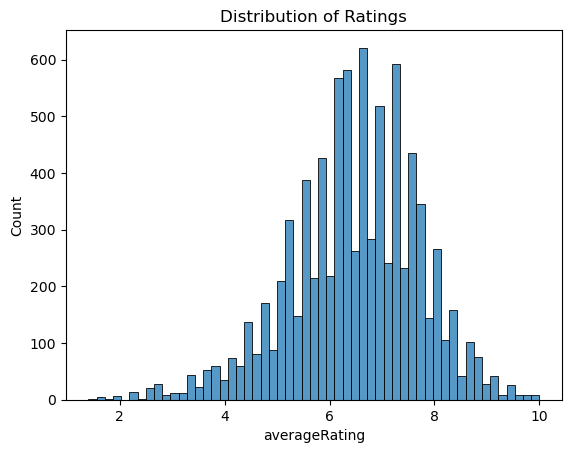

In [15]:
sns.histplot(netflix_df['averageRating'])
plt.title("Distribution of Ratings")
plt.show()

For the number of votes distribution, the numVotes variable is extremely right-skewed due to some movies having huge vote counts (in the millions). Using a log scale on this variable will allow for the distribution to become more readable. In the log transformed graph, the pattern is more visible. Here, there is a right skewed patten suggesting that majority of the movies in our dataset accumulated few votes and only a small portion of movies accumulated large vote counts.

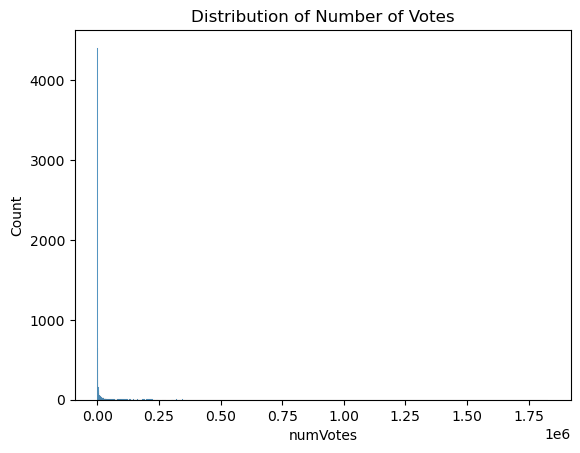

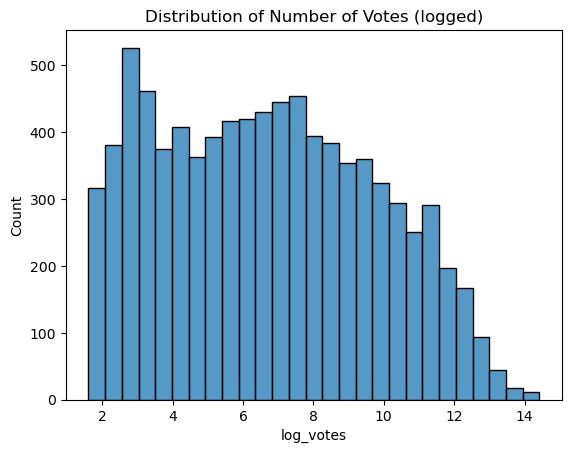

In [16]:
#not log transformed
sns.histplot(netflix_df['numVotes'])
plt.title("Distribution of Number of Votes")
plt.show()

#log transform numVotes since the distribution is not normal
netflix_df['log_votes'] = np.log(netflix_df['numVotes'])
sns.histplot(netflix_df['log_votes'])
plt.title("Distribution of Number of Votes (logged)")
plt.show()

With a scatterplot, we can plot the logged number of votes on the x-axis and ratings on the y-axis to visualize how the average rating changes in relation to the vote count. We can also observe if there are any clusters at the very high/low ratings and if these could be attributed to low vote counts. We can also see if more votes will stabilize ratings to a certain value. 

From the graph, it's clear that there is no strong linear relationship as the points cluster between the rating scores of 5 and 8 and stretch across the number of votes. Movies with few votes show great variance in ratings, acknowledging extreme ratings and movies with a considerable amount of votes display more stability within their ratings with almost no movies falling below the rating of 4. 


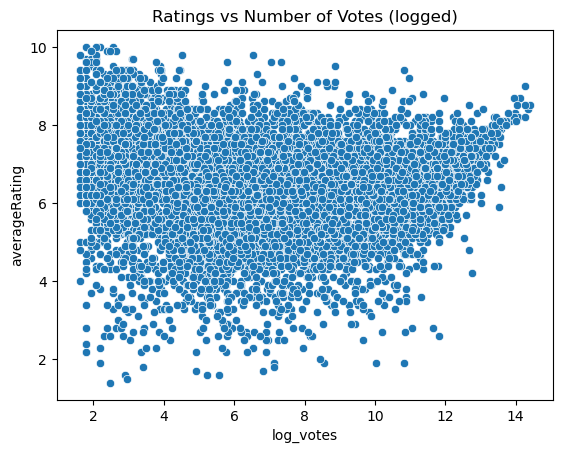

In [17]:
sns.scatterplot(netflix_df, x = 'log_votes', y= 'averageRating')
plt.title("Ratings vs Number of Votes (logged)")
plt.show()

We can first compute the Spearman correlation to observe if the number of votes and rating move together.

From the printed outputs, it seems there is a statistically significant (as seen from the pvalue) but extremely weak negative relationship between ratings and number of votes. Vote counts doesn't seem to have the ability to meaningfully predict the rating.

In [18]:
corr, p_value = scipy.stats.spearmanr(netflix_df['log_votes'], netflix_df['averageRating'])
print("correlation:", corr)
print("p-value:", p_value)

correlation: -0.16245889596919239
p-value: 9.858638063053887e-52


Running OLS (ordinary least squares) will allow us to get a full picture of how log_votes relates to rating, assuming linearity. (Note: look at limitations section for OLS Model Limitations)

**Analysis and Interpretation for Preregistation #3**\
Summary:
- A 1-unit increase in log_votes causes the rating to drop by 0.05. Movies that become massively more popular see a slight decrease in their ratings. So, more popularly rated movies see slightly lower ratings than those with less votes. 
- A pvalue of 0.000 indicates that the effect is statistically significant – this negative relationship is not due to chance.
- Overall, the relationship is weak but statistically significant. 

Interpretations/Predictions:
- The regression equation for our model is averageRating = 6.8242 - 0.0530(log_votes)
- If log_votes goes up by 0 (num_votes = 1), we observe the averageRating to be around 6.82.
- If log_votes goes up by 2.30 (num_votes = 10), we observe the averageRating to be around 6.70.
- If log_votes goes up by 11.51 (num_votes = 100,000), we observe the averageRating to be around 6.21.

Oddities:
- With R-squared being 0.017, the number of votes variable explains only a small proportion, 1.7%, of the variability in ratings. Other factors might be influencing the outcome and are worth considering.
- The model predicts a movie's rating to be 6.8242 - 0.0530(log_votes) for every additional unit increase in log votes, meaning that at one point when there is an extremely high vote count such that log votes is around 110, the model predicts ratings less than 1. However, this cannot be as IMDb ratings follow a scale between 1 and 10. 


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     145.3
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           3.35e-33
Time:                        13:40:43   Log-Likelihood:                -13948.
No. Observations:                8564   AIC:                         2.790e+04
Df Residuals:                    8562   BIC:                         2.791e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8242      0.032    211.082      0.0

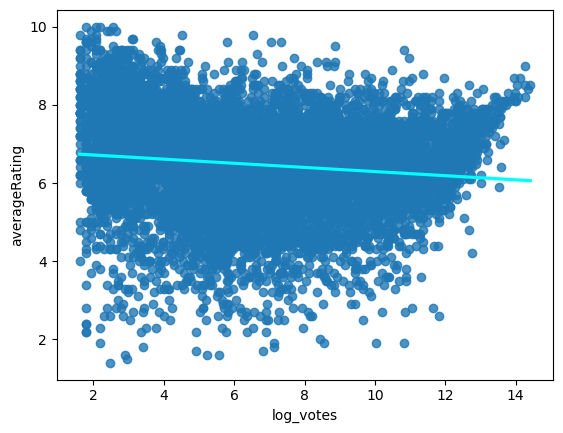

In [19]:
X = netflix_df['log_votes']
X = sm.add_constant(X)
y = netflix_df['averageRating']

model = sm.OLS(y, X).fit()
print(model.summary())

#visualize regression line
sns.regplot(netflix_df, x="log_votes", y='averageRating', line_kws={"color": "cyan"})
plt.show()


Although the OLS model provided an overall linear relationship between number of votes and rating, the small effect size suggested that a linear model might be insufficient. This drew us to examine more closer in the pattern of this relationship. More specificially, it raised questions about how ratings behaved across the spread of vote counts -- whether movies with few votes tend to receive extremely high or low ratings and whether large vote counts stablize around a central value. 

To further analyze this, we can implement a box plot that observes ratings across different vote count bins. 

From here we can see that the low vote count bins have the highest median ratings around 7, middle bins having a lower rating around 6.2, and the high vote bins to rise again to 6.6. This U-shaped pattern suggests that the relationship between number of votes and ratings is not monotonic which might have explained why our OLS regression slope was very small.  

Movies with very few votes show the widest spread of ratings, so extreme ratings are more prone here. With a limited number of votes, ratings can easily be skewed by a small portion of biased viewers (satisfied or dissatisfied) which raises concerns on the ratings credibility. Additionally, the heavy concentration of outliers on the bottom whisker reveal that while low vote count movies recieve unusually high ratings, the more common pattern is that these movies are more prone to extremely negative ratings. 

As the number of votes increases, the spread of ratings becomes narrower and the high vote count bins' median ratings converge to to a central value around 6.4. With more viewers rating a movie, the rating stabilizes to reflect the broader audience and so for majority of these movies, we can expect ratings between 6 and 7 to be more accurate. 

Ratings might not necessarily be a reliable indicator of popularity simply because ratings are biased by vote count size (low counts don't represent public consensus) and high ratings don't imply large audiences & popularity (and vice versa) -- popular movies can have average ratings around the central value and niche movies could have higher ratings but don't have a substantial amount of votes and viewership. Instead, number of votes might be a better indicator since it is more directly associated with the number of viewers that engage with a movie.

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '(4.999, 35.0]'),
  Text(2, 0, '(35.0, 284.0]'),
  Text(3, 0, '(284.0, 1862.6]'),
  Text(4, 0, '(1862.6, 15560.2]'),
  Text(5, 0, '(15560.2, 1829390.0]')])

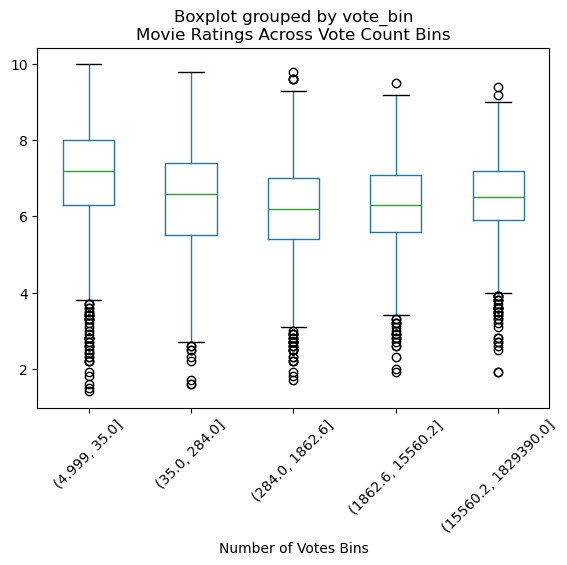

In [23]:
#create bins for number of votes (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
netflix_df['vote_bin'] = pd.qcut(netflix_df['numVotes'], q=5)

netflix_df.boxplot(column = 'averageRating', by = 'vote_bin', grid = False)
plt.title('Movie Ratings Across Vote Count Bins')
plt.xlabel("Number of Votes Bins")
plt.xticks(rotation=45)


# __6. EVALUATION OF SIGNIFICANCE:__

**Pre-registration Statement 1:** To determine the variable that had the most effect on the popularity of a movie, we turned to a Logistic Regression with a Logit function.  Based on the p-values and z-scores of each variable, we have determined that the Global availability of a movie is the highest contributor to the popularity of a movie.  We found that the p-value is lower in Global Availability with 3.84e-84 compared to all other variables.  Furthermore, we also looked at the z-score of each of the variables, where Global Availability has a higher magnitude of z-score with 19.436 compared to all other variables.  This means that Global availability is the most impactful, as z-score is a derivative of p-value, where the higher the z-score, the more significant and impactful the variable is to popularity. So, since global availability is the most impactful predictor variable, we can establish that we will reject the null hypothesis of Global availability not being the most impactful variable on movie popularity because Global availability has a lower p-value and a higher z-score than average ratings.  That being said, the p-values and the magnitude of z-scores for the two predictor variables are extremely close, and so we have to note that, despite failing to reject the null hypothesis, global availability is still one of the most impactful variables in predicting popularity.

**Pre-registration statement 2:** The analysis for global availability’s effect on popularity involved a hypothesis test with a bernoulli variable. If there is no difference in popularity between global and non-global movies, a movie’s probability of being popular is 0.16031073. Given that global and non-global movies perform the same, the expected number of non-global popular movies is 1406, but the actual number of non-global popular movies is 1135 movies. In other words, the actual number of non-global popular movies is 271 lower than expected if the null hypothesis is true. After calculating the z-score and using it as the parameter for the scipy.stats.norm.sf(abs(z_score)) function, the resulting p-value is 1.4684026891657207e-15, which is essentially 0. There is nearly 0 possibility of randomly getting the observed 1135 non-global popular movies if global availability has no statistically significant relationship with popularity. Ultimately, the p-value is lower than the significance level of 0.05, so we reject the null hypothesis that globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views. 

**Pre-registration statement 3:** To observe the full statistical picture of the relationship pattern between the logged number of votes and ratings, we used both Spearman correlation and OLS for analysis. Utilizing Spearman allowed us to assess the strength and direction of this relationship where we we observed the correlation coefficient to be -0.16 with a pvalue < 0.05. Simply put, there is a weakly negative but statistically significant relationship where ratings decrease slightly as number of votes increases. 

This was further reinforced by the OLS regression, where the coefficient of log_votes was -0.05 with a pvalue of 0.000. While small, this effect is statistically significant and goes to show how number of votes can shape overall ratings, even by a little. If we apply these findings to movie-rating behavior, the coefficient makes sense -- movies that receive rating inputs from larger, broader audiences will eventually produce a slightly lower rating that is representative of the public consensus. From the pvalues calculated above, both are lower than the significance level of 0.05, so we reject the null hypothesis and claim that there is a weak negative relationship between the variables. 

# __7. RETURNING TO THE MAIN RESEARCH QUESTIONS:__

Running the analysis of the following preregistrations revealed global availability to be a strong variable in determining movie popularity.

Using train_test_split, we'll create two new dataframes, `netflix_train` and `netflix_test`, with 20% of the data in the test set to find the coefficient values and make predictions on movie popularity. 

We'll visualize the predictions with a confusion matrix and utilize a classification report to see how well the classifier performed. From the outputs, the model does well in identifying non popular movie. When predicting a movie that is not popular, 83% of them are correctly predicted (where precision = 0.83 or 1368 TN / 1649 predicted). The model also correctly identifies 98% of all nonpopular movies (recall = 0.98 or 1368 TN / 1396 actually nonpopular).

However, when it comes to identifying popular movies, the model does not perform well. With a precision of 0.56, 56% of the predicted popular movies are actually popular and with a recall of 0.11, only 11% of the actual popular movies were identified. This low recall value indicates that 88% of the popular movies are labeled as not popular which might not be helpful in discovering popular movies. 

It seems that our model predicts not popular for majority of the movies, as seen in the high precision and recall, but doesn't do as good in detecting popular movies.

Train: (6851, 37)
Test: (1713, 37)
Is_Global: 1.33
numVotes: 0.0
Genre: Documentary: -0.48
Genre: Drama: -0.4
Genre: Action: 0.81
Genre: Family: 0.37
Genre: Talk-Show: 1.32
Romance__x__Comedy: 0.41
intercept: -1.88
347     0
673     1
5024    0
4419    0
5152    0
Name: Popularity, dtype: int64
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1408
           1       0.48      0.10      0.16       305

    accuracy                           0.82      1713
   macro avg       0.66      0.54      0.53      1713
weighted avg       0.77      0.82      0.77      1713



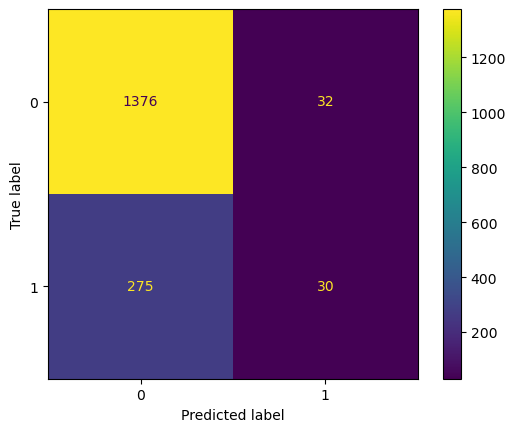

In [21]:
netflix_train, netflix_test = train_test_split(netflix_df, test_size = 0.2)
print("Train:", netflix_train.shape)
print("Test:", netflix_test.shape)

variables = ["Is_Global", "numVotes", "Genre: Documentary", "Genre: Drama", "Genre: Action", "Genre: Family", "Genre: Talk-Show", "Romance__x__Comedy"]

model = LogisticRegression(max_iter = 500)
model.fit(netflix_train[variables], netflix_train['Popularity'])

for variable, coef in zip(variables, model.coef_[0]):
    print(str(variable) + ": " + str(np.round(coef, 2)))

print("intercept: " + str(np.round(model.intercept_[0], 2)))

#predict with the test set
test_predictions = model.predict(netflix_test[variables])
residuals = netflix_test['Popularity'] - test_predictions
print(residuals.head())

#visualizing with a confusion matrix (https://www.w3schools.com/python/python_ml_confusion_matrix.asp)
confusion_matrix = metrics.confusion_matrix(netflix_test['Popularity'], test_predictions)
metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [0, 1]).plot()

#view precision and recall (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
print(metrics.classification_report(netflix_test['Popularity'], test_predictions))

# __7. CONCLUSION:__

Taking our findings from our preregistration analyses, there is strong evidence that global availability, along with number of votes and documentary, drama, action, family, talk-show, and rom-com genres, are important variables for viewership and popularity. Via the 1st preregistration statement, global availability had the lowest p-value and the highest magnitude in terms of z-score among all the other variables considered in the model, indicating that this variable would be the most impactful determinant of a movie’s popularity. Next, the 2nd preregistration statement’s result is that there is nearly 0 possibility of randomly getting the observed number of non-global popular movies if global availability has no statistically significant relationship with popularity. Therefore, the entire 2nd preregistration statement’s analysis furthers the claim that global availability is most important for viewership. Finally, the 3rd preregistration analysis revealed why ratings might not have been an influential criterion, as noticed in preregistration 1. Despite a weakly negative but statistically significant relationship between number of votes and ratings being present, it is not exactly strong, as seen in our Spearman and OLS regression coefficient values. It seems that the ratings variable would not provide meaningful contributions in predicting viewership or popularity in comparison to other criteria, like global availability. Because of how small the relationship effect is and the fact that low vote count movies are more prone to bias, ratings would only offer limited predictive values and not give us the full picture of popularity. While this variable may hold little weight in answering our main research question, further exploratory analysis suggested that number of votes could be considered as a better criterion for determining popularity since it is a direct proxy to viewership count.

That being said, we were able to conclude a set of criteria for Netflix executives to refer to when seeking popular movies to maximize user retention and viewership. Findings suggested that Netflix should prioritize acquiring globally available movies with a significant number of voters (disregarding the ratings themselves) and focus on genres that highly influence popularity, such as action, family, talk-show, and rom-com, given their positive coefficients, while avoiding genres like documentary and action that would negatively impact popularity. 

Shifting to the second half of our research question (Are we able to accurately predict popularity according to the characteristics identified as the most influential?) and the train-test split, the results revealed that our prediction model, based on said criteria, was able to perform well in identifying non-popular movies for the most part but falls short in predicting ability when it comes to popular movies. To answer our research question, our model is NOT able to accurately predict popularity with our set of criteria, given our small recall value (=0.11) and the fact that the prediction model misses almost 89% of the popular movies we were aiming to detect. Although this means that the model cannot predict popular movies, the non-popular movie predictions are still valuable in the context of Netflix’s engagement goals. By determining which movies are likely to be unpopular and not have much viewer traction in the long run, Netflix can avoid further promoting current movies identified as unpopular in their recommendation and ranking systems while preventing these movies from being onboarded to the platform in the first place. The reduction of low-performing content will allow Netflix to better meet its audience's goals to maximize enjoyment and entertainment, enhancing Netflix’s image as a streaming service that consistently delivers high-quality content. 

It seems that global availability, number of votes, along a set of niche genres are key determinants of viewership across Netflix's catalog. With these insights, Netflix now has a concrete strategy for planning its content for the future. By identifying movies likely to be unpopular, Netflix can avoid ones that are unlikely to attract high viewership and confidently allocate its budget and resources to prioritize titles that are expected to drive user satisfaction while potentially increasing user subscriptions and profits. 

# __8. DATA LIMITATIONS:__


Limitations of potential harms and data gaps:  
- **Timespan Limitation**: Our dataset only covers a 2.5-year period worth of Netflix data spanning from January 2023 to June 2025. The short timeframe makes it hard to generalize our findings to other years and their movies. This makes the Netflix executives prone to adding movies with certain genres that are recent phenonmeons but not reflective of the long-term trend, and thus Netflix’s future viewership won’t be as high as desired.  
- **Filling Missing Data Limitation**: The first half of 2023 dataset was missing 2 important variables: runtime and number of views. We filled these missing columns with their respective averages of known data, but this approach risks suggesting a consistent pattern across all the first half of 2023 movies. While the missing values have been addressed, these are not exactly the true runtime and views, meaning our data analysis is biased. Just as how the timespan limitation hurts the decision-making process, the Netflix executives to select future movies that are not the best choice since the part of the model is formed by assumed data.  
- **Duplicate Title Limitation**: Our Netflix dataset contains duplicates of certain movies as they appeared in multiple engagement reports during collection. To address this, we removed the duplicates and kept only the instance with its max views. We chose this instance for the following reason: each engagement report tracks only the viewership during that period because views reset in the reports. The maximum views in a period makes sense to represent when the movie reaches peak popularity. Such removal of all non-maximum instances reduces the total number of views for certain Netflix time periods and alter our observations of viewership over time. Our data analysis underestimates the movies with sustained popularity over multiple half-year periods. When deciding future movies, the Netflix executives will be more likely to look for instant hits. From a viewer perspective, they will likely be recommended new movies more frequently because Netflix won’t value movies with sustained long-term popularity as much.  
- **Titles Limitation**: Not every Netflix title matches with an IMDb rating. We lost many movies in the Netflix engagement that were missing ratings. This harms our predictions of viewership based on ratings because many movies are missing from the analysis. Specifically when considering naming across Netflix and IMDb, we think the titles with complex titles and those with alternate release names in different regions are most likely to not have exact matches between Netflix and IMDb, due to formatting inconsistencies. This could affect the analysis by disproportionately reducing the number of regional movies compared to international, widespread movies, making it appear that regional ones are less watched than in reality. As a result, the Netflix executives will over-favor selecting global movies, which harms Netflix viewership and is to the detriment of the viewers who won’t have as many regional movie available to them.  
- **IMDb Limitations**: Anyone on IMDb can rate. Not all reviews are the same quality because there is no verification of whether or not they truly watched the movie or have external motives (e.g., review bombing to troll or rating highly just because their favorite actor is in it). This could impact our analysis by creating trends that do not exist from those who did not watch the movie as a genuine viewer. In addition, people who rated movies on IMDb may have watched them in ways other than Netflix. In other words, the ratings bring in people who are not related with Netflix into our cleaned dataset, so our analysis could be inaccurate if the Netflix reviewers think differently compared to non-Netflix reviewrs. Overall, Netflix executives will be selecting future movies based on the opinions of non-Netflix audiences, resulting in non-optimal choices.
We observe variation in the number of votes that determined each movie’s IMDb rating. Those with a smaller number of votes could skew the rating, which could ultimately affect our analysis of how ratings correlate with viewership.  
- **Population Variable Limitation**: Mainstream movies are likely to garner more viewership than indie movies. Since we took the pure average of views to determine the baseline for what makes a movie popular, it means that many mainstream movies will automatically be considered popular because of their high view count. In our results, the number of mainstream movies are disproportionately high since other qualities that determine popularity are not accounted for. Therefore, Netflix executives will select more mainstream movies, and those looking for indie movies will have more difficulty finding what they want on Netflix.  

Limitations of significance metrics:  
- **Multivariable Logistic Regression Limitation, overfitting**: To analyze subquestion 1 (does the global availability of movies have a larger impact on the movie popularity (defined in terms of views) compared to ratings, the number of votes, and genres?), the multi-variable logistic regression included twenty different genre variables. We included all of these genres because it took this many genres to capture 98% of all movies in our dataset, which was our desired percentage for the most representative dataset possible. Having twenty genre variables results in overfitting (the model shapes itself too closely to our dataset). As a result, it does not generalize to the entire population of Netflix movies including those outside our dataset. When choosing future movies, Netflix executives will incorrectly select ones similar to the patterns in our dataset, not the more general pattern for all Netflix movies.  
- **Multivariable Logistic Regression Limitation, multi-collinearity**: In our dataset, a single movie could take on multiple genres. We thought some genres would be correlated with others. For example, Romance and Comedy have positive correlation. Therefore, we manually coded a few interaction variables (we did not interact all the 20 genres to prevent further overfitting). The number of interactions is our human decision, and it might not be optimal. Our efforts of adding estimation variables is better than nothing, but incomplete. The genre coefficients are not accurate, and it’s not possible to know the true significance of each genre on popularity. Netflix executives may be misguided when choosing future movies by genre.   
- **OLS Model Limitation**: For our 3rd question (Is there a direct linkage between ratings and number of votes such that number of votes predicts rating?), we utilized an OLS model to analyze the relationship between number of votes and average rating.  Just because the statistic value is very good, that doesn’t mean we have full confidence in our model. The true relationship between votes and ratings may not be linear, but OLS assumes linear relationships. As a result, the OLS model may be unreliable, causing the Netflix executives to be make incorrect future movie selections.

# __9. ACKNOWLEDGEMENTS AND BIBLIOGRAPHY:__


Acknowledgements: The authors would like to thank Professor Wilkens and TAs Kyle Du and Nick Bergersen for their instructions and support with this project.

Citations: The outside sources to help us with code are cited within their code cell. Below are the data sources and research papers we used in this project:

Francemone, C. J., et al. “Examining Genre Success, Co-Occurrence, Release, and Production of 9,068 Films over Twenty Years.” *Poetics*, vol. 99, 2023, Article 101794. Elsevier, https://doi.org/10.1016/j.poetic.2023.101794.  

Jang, Moonkyoung, et al. “How do global audiences of TV shows take shape?: Evidence from Netflix.” Applied Economics Letters, vol. 30, no. 3, 2023, pp. 285-291. Taylor & Francis. https://www.tandfonline.com/doi/full/10.1080/13504851.2021.1983916.  

Lee, Changjun, and Sung Wook Ji. “Strategies for launching streaming content: Assessing movie-country relatedness and its impact on international popularity.” PloS One vol. 19,6e0305433. 14 Jun. 2024, doi:10.1371/journal.pone.0305433.  

Ramos, Marlon et al. “Statistical Patterns in Movie Rating Behavior.” PloS one vol. 10,8e0136083. 31 Aug. 2015, doi:10.1371/journal.pone.0136083.  

Renub Research. *United States Movie Market Size and Share Analysis – Growth Trends and Forecast Report 2025-2033*. Research and Markets, Feb. 2025, www.researchandmarkets.com/report/united-states-film-motion-picture-market?srsltid=AfmBOoommR667lneiyqtxGU_mtwCg322TPnN4lHaFdDPQKPVGvyx0tK.  

Sahu, S., et al. "Movie Popularity and Target Audience Prediction Using the Content-Based Recommender System." *IEEE Access*, vol. 10, pp. 42044-42060, 2022, https://doi.org/10.1109/ACCESS.2022.3168161.  

Shahid, M. H., and M. A. Islam. “Investigation of Time Series-Based Genre Popularity Features for Box Office Success Prediction.” PeerJ Computer Science, vol. 9, 2023, e1603, https://pmc.ncbi.nlm.nih.gov/articles/PMC10703092/.

Singh, Rajesh. “Netflix Subscribers Statistics 2025: User Trends & Insights.” *TwinStrata*, 8 Oct. 2025, https://www.twinstrata.com/netflix-subscribers-statistics/. 

“What We Watched: A Netflix Engagement Report.” *Netflix*, 13 Dec. 2023, about.netflix.com/en/news/what-we-watched-a-netflix-engagement-report.


“What We Watched the First Half of 2024”, *Netflix*, 19 Sept. 2024, https://about.netflix.com/en/news/what-we-watched-the-first-half-of-2024.  

“What We Watched the First Half of 2025”, *Netflix*, 17 Jul. 2025, https://about.netflix.com/en/news/what-we-watched-the-first-half-of-2025.  

“What We Watched the Second Half of 2023.” *Netflix*, 23 May 2024, https://about.netflix.com/en/news/what-we-watched-the-second-half-of-2023.  

“What We Watched the Second Half of 2024”, *Netflix*, 26 Feb. 2025, https://about.netflix.com/en/news/what-we-watched-the-second-half-of-2024.